<a href="https://colab.research.google.com/github/Jamtech77/Python/blob/master/PyLadies_X_AIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://miro.medium.com/max/1400/0*ItYfFlc7xB9xA_cE.jpg)

# 金融爬蟲

### 爬蟲過程
- (觀察)找出拿到資料的網址：換換看參數
- (程式)獲取該網址中的資料：requests
- (程式/觀察)解析出想要的資訊：Python 內建、XPath
- (自訂)決定儲存方式
- (程式)更快速穩定彈性的重複以上步驟：函式

### 爬蟲觀念
- 若資料有多個來源，可以多方比對，確保爬取的來源資訊正確
- 如果對方網站會有阻擋的行為，代表不希望爬蟲影響網站運作，可以配合 `time.sleep()`，不太過頻繁抓取

## lxml：yahoo!股市 即時成交明細

In [ ]:
import requests
url = "https://tw.stock.yahoo.com/q/ts?s=2330"
response = requests.get(url)
html = response.text
# print(html)

In [ ]:
from lxml import etree
xpath_1 = "//html/body/center/table[1]/tbody/tr/td[1]/table[2]//text()"
xpath_2 = "//table[@border=0 and @width=700][1]//td//text()"
page = etree.HTML(html)
result = page.xpath(xpath_2)
result_list = []
for index,row in enumerate(result):
    if index>=10 and index%7==3:
        # print(index,row)
        row_list = result[index:index+7]
        # print(index,row_list)
        if ":" in row_list[0]:
            result_list.append(row_list)
for i in (result_list):
    print(i)

## json：[yahoo!股市 每日技術分析](https://tw.stock.yahoo.com/q/bc?s=2330)

In [ ]:
import requests
url = "https://tw.quote.finance.yahoo.net/quote/q?type=ta&perd=d&mkt=10&sym=2330&v=1"
response = requests.get(url)
html = response.text
print(html)

null({"mkt":"10","id":"2330","perd":"d","type":"ta","mem":{"id":"2330","name":"台積電","257":0.0,"258":0.0,"781":0.0,"275":8.4087068E7,"288":3.49026,"544":4.335151,"290":1000.0,"291":13.96,"292":53.99,"293":43.46,"294":39.51,"308":0.0,"822":0.0,"823":8.68,"574":0.0,"833":0.0,"834":618.0,"835":600.0,"323":0.0,"836":618.0,"324":0.0,"837":570.0,"325":0.0,"326":0.0,"327":0.0,"328":0.0,"329":0.0,"842":0.0,"843":0.0,"844":0.0,"845":9.25,"592":0.0,"849":0.0,"338":0.0,"850":0.0,"339":0.0,"340":0.0,"342":0.0,"344":0.0,"345":0.0,"101":618.0,"102":619.0,"103":617.0,"104":620.0,"105":616.0,"106":621.0,"107":615.0,"108":622.0,"109":614.0,"110":623.0,"878":616.0,"113":55,"114":1210,"882":949313.0,"115":27,"116":1538,"117":72,"118":258,"119":278,"120":389,"121":346,"122":191,"125":619.0,"126":612.0,"127":619.0,"128":29995,"129":612.0,"130":619.0,"131":607.0,"132":673.0,"133":551.0,"645":9924,"646":21208,"647":2253,"135":0.0,"392":0.0,"136":0.0,"138":0.0,"396":9.48,"397":50.2,"141":0.0,"398":39.16,"399":

[JSON Parser Online](http://json.parser.online.fr/)

In [ ]:
import json
data = html.split("null(")[-1].split(");")[0]
json_data = json.loads(data)
for ele in json_data["ta"]:
    print(ele["t"],ele["o"],ele["h"],ele["l"],ele["c"],ele["v"])

## 函式：[台灣銀行的股市資訊網](https://fund.bot.com.tw/z/index.htm)

In [ ]:
import requests
def get_html(stock_id):
    url = "https://fund.bot.com.tw/Z/ZC/ZCW/CZKC1.djbcd?a={}&b=D&c=10".format(stock_id)
    resp_html = requests.get(url)
    html = resp_html.text
    return html

def parse_html(html):
    group = html.split(" ")
    g_date,g_open,g_high,g_low,g_close,g_volume = group[0:5+1]
    g_date = g_date.split(",")
    g_open = g_open.split(",")
    g_high = g_high.split(",")
    g_low = g_low.split(",")
    g_close = g_close.split(",")
    g_volume = g_volume.split(",")
    datas = []
    for i in range(0,len(g_date)):
        datas.append([g_date[i],g_open[i],g_high[i],g_low[i],g_close[i],g_volume[i]])
    return datas

for stock_id in [2330,2317]:
    html = get_html(stock_id)
    datas = parse_html(html)
    for i in range(0,len(datas)):
        print(stock_id,datas[i])

# [API 使用 - LINE Notify](https://marsw.github.io/Python-Tutorial/07_v2_applications.slides.html#/2)

In [ ]:
import requests
token = "你的權杖"
msg = "用 Python 發 LINE Notify 通知"

url = "https://notify-api.line.me/api/notify"
headers = {
    "Authorization": "Bearer " + token, 
    "Content-Type" : "application/x-www-form-urlencoded"
}
payload = {'message': msg}
r = requests.post(url, headers = headers, params = payload)

# Flask & SQL

## 環境設定

In [ ]:
!pip install flask-ngrok

## DB 設定

In [ ]:
import sqlite3
conn = sqlite3.connect('stocks.db') # 如果資料庫不存在，會自動幫你建立
sql_create_table = """
CREATE TABLE `stock_date` (
	`stock_id`	INTEGER,
	`date`	TEXT,
	`open`	REAL,
	`high`	REAL,
	`low`	REAL,
	`close`	REAL,
	`volume`	INTEGER
)
"""
cursor = conn.execute(sql_create_table)
conn.close()

In [ ]:
datas_2330 = [
    ['2020/03/02', '308', '317', '308', '311', '86373'],
    ['2020/03/03', '318.5', '320', '316', '317.5', '55169'],
    ['2020/03/04', '322', '322', '317', '320.5', '44745'],
    ['2020/03/05', '325', '326', '323', '323', '38224'],
    ['2020/03/06', '320', '320.5', '315', '315', '52808']
]
datas_2317 = [
    ['2020/03/02', '78.2', '80.3', '78.1', '79.2', '54992'],
    ['2020/03/03', '81.1', '82', '80.6', '81', '34822'],
    ['2020/03/04', '81.5', '81.9', '81.1', '81.7', '29908'],
    ['2020/03/05', '83.3', '83.6', '82.6', '82.7', '36950'],
    ['2020/03/06', '81.6', '81.7', '80.7', '80.8', '38713']
]
def ins_stock_data(stock_id,datas):
    conn = sqlite3.connect('stocks.db')
    for row in datas:
        d, o, h, l, c, v = row
        sql_ins = """
            INSERT INTO `stock_date` (`stock_id`, `date`, `open`, `high`, `low`, `close`, `volume`)  
            VALUES ( {} ,'{}', {}, {}, {}, {}, {} )
        """.format(stock_id,d.replace("/","-"),float(o),float(h),float(l),float(c),int(v))
        cursor = conn.execute(sql_ins)
        cursor = conn.commit()
    conn.close()

ins_stock_data(2330,datas_2330)
ins_stock_data(2317,datas_2317)

## Template
- 在 `templates` 資料夾有檔案 `stock_date.html`

In [ ]:
filecontent = """<h1>股票代碼: {{ stock_id }}</h1>
<h1>查詢日期: {{ date_start }}</h1>
<a href='/'>回首頁</a>
<table>
    <thead>
        <tr>
            <th>日期</th>
            <th>開盤價</th>
            <th>最高價</th>
            <th>最低價</th>
            <th>收盤價</th>
            <th>成交量</th>
        </tr>
    </thead>
    <tbody>
        {% for row in datas %}
        <tr>
            <td>{{ row[0] }}</td>
            <td>{{ row[1] }}</td>
            <td>{{ row[2] }}</td>
            <td>{{ row[3] }}</td>
            <td>{{ row[4] }}</td>
            <td>{{ row[5] }}</td>
        </tr>
        {% endfor %}
    </tbody>
</table>
"""

In [ ]:
import os
dir_name = "templates"
if dir_name not in os.listdir():
    os.makedirs(dir_name)
fo = open("templates/stock_date.html","w") 
fo.write(filecontent)
fo.close()

## 網站呈現

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
from flask import request
import sqlite3
app = Flask(__name__)
run_with_ngrok(app)

def get_stock_datas(stock_id,date_start):
    conn = sqlite3.connect('stocks.db')
    sql = """
        SELECT `date`, `open`, `high`, `low`, `close`, `volume`
        FROM `stock_date`
        WHERE `stock_id` = {} and `date`>='{}'
        ORDER BY `date`
    """.format(stock_id,date_start)
    cursor = conn.execute(sql)
    datas = cursor.fetchall()
    return datas

@app.route("/")
def home():
    resp = """Welcome to Stock Board 
    <br> 
    <a href='/stock/2330/2020-03-05'>進入2330股票頁(路徑)</a> 
    <br> 
    <a href='/stock?stock_id=2330&date_start=2020-03-05'>進入2330股票頁(參數)</a>
    """
    return resp

@app.route("/stock/<stock_id>/<date_start>")
def get_stock_path(stock_id, date_start):
    return render_template("stock_date.html", stock_id=stock_id, date_start=date_start, datas = get_stock_datas(stock_id,date_start))

@app.route("/stock")
def get_stock_param():
    stock_id = request.args.get('stock_id')
    date_start = request.args.get('date_start')
    return render_template("stock_date.html", stock_id=stock_id, date_start=date_start, datas = get_stock_datas(stock_id,date_start))

app.run()

# pandas

## 數據操作與統計

In [ ]:
import pandas as pd

In [ ]:
datas = [
    ['2330','2020/03/02', '308', '317', '308', '311', '86373'],
    ['2330','2020/03/03', '318.5', '320', '316', '317.5', '55169'],
    ['2330','2020/03/04', '322', '322', '317', '320.5', '44745'],
    ['2330','2020/03/05', '325', '326', '323', '323', '38224'],
    ['2330','2020/03/06', '320', '320.5', '315', '315', '52808'],
]
dfl = pd.DataFrame(datas)

In [ ]:
dfl

,0,1,2,3,4,5,6
0,2330,2020/03/02,308,317,308,311,86373
1,2330,2020/03/03,318.5,320,316,317.5,55169
2,2330,2020/03/04,322,322,317,320.5,44745
3,2330,2020/03/05,325,326,323,323,38224
4,2330,2020/03/06,320,320.5,315,315,52808


In [ ]:
dfl.columns = ["stock_id","date","open","high","low","close","volume"]
dfl["open"]=dfl["open"].astype(float)
dfl["high"]=dfl["high"].astype(float)
dfl["low"]=dfl["low"].astype(float)
dfl["close"]=dfl["close"].astype(float)
dfl["volume"] = dfl["volume"].astype(int)
dfl.describe()

,open,high,low,close,volume
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,318.700000,321.100000,315.800000,317.400000,55463.800000
std,6.457554,3.286335,5.357238,4.682414,18537.948935
min,308.000000,317.000000,308.000000,311.000000,38224.000000
25%,318.500000,320.000000,315.000000,315.000000,44745.000000
50%,320.000000,320.500000,316.000000,317.500000,52808.000000
75%,322.000000,322.000000,317.000000,320.500000,55169.000000
max,325.000000,326.000000,323.000000,323.000000,86373.000000


In [ ]:
print(dfl["open"].median())
print(dfl["open"].max())
print(dfl["open"].min())
print(dfl["open"].describe()["25%"])

320.0
325.0
308.0
318.5


In [ ]:
dfln = dfl.copy()
dfln["CDP"]=(dfln["high"]+dfln["low"]+dfln["close"]*2)/4
dfln

,stock_id,date,open,high,low,close,volume,CDP
0,2330,2020/03/02,308.0,317.0,308.0,311.0,86373,311.750
1,2330,2020/03/03,318.5,320.0,316.0,317.5,55169,317.750
2,2330,2020/03/04,322.0,322.0,317.0,320.5,44745,320.000
3,2330,2020/03/05,325.0,326.0,323.0,323.0,38224,323.750
4,2330,2020/03/06,320.0,320.5,315.0,315.0,52808,316.375


## 區間切分 & 計算各區間個數

In [ ]:
df2 = dfl.copy()
# 切分點 (配合 include_lowest, right 參數決定是否包含左右端點，左邊預設 False，右邊預設 True)
listBins = [0, 36950, 45000, 55000,60000,100000000]

# 切分區後的對應標籤
listLabels = ['0~36950','36951~45000','45001~55000','55001~60000','60001~']

df2['volume_group'] = pd.cut(df2['volume'], bins=listBins, labels=listLabels, include_lowest=True)
df2

,stock_id,date,open,high,low,close,volume,volume_group
0,2330,2020/03/02,308.0,317.0,308.0,311.0,86373,60001~
1,2330,2020/03/03,318.5,320.0,316.0,317.5,55169,55001~60000
2,2330,2020/03/04,322.0,322.0,317.0,320.5,44745,36951~45000
3,2330,2020/03/05,325.0,326.0,323.0,323.0,38224,36951~45000
4,2330,2020/03/06,320.0,320.5,315.0,315.0,52808,45001~55000


In [ ]:
df2["volume_group"].value_counts()

36951~45000    2
60001~         1
55001~60000    1
45001~55000    1
0~36950        0
Name: volume_group, dtype: int64

## [均線](https://www.cmoney.tw/learn/course/technicals/topic/485)
- (Moving Average，MA)
- 最近n日(包含當天)的平均收盤價：`MA = (c1+c2+...+cn)/n`


In [ ]:
# df_ma = pd.read_csv("2330_2020.csv")
df_ma = pd.read_csv("https://drive.google.com/uc?export=download&id=1ZNIuVf_Dz5mcHKqk6ed6ELamtQSYS-5r")
df_ma

,stock_id,date,open,high,low,close,volume
0,2330,2020-01-02,332.5,339.0,332.5,339.0,33282
1,2330,2020-01-03,344.0,345.0,335.5,339.5,42023
2,2330,2020-01-06,333.0,334.5,332.0,332.0,45677
3,2330,2020-01-07,332.5,333.0,326.5,329.5,51746
4,2330,2020-01-08,325.0,333.0,325.0,329.5,37914
...,...,...,...,...,...,...,...
67,2330,2020-04-20,308.0,309.0,302.5,304.0,44587
68,2330,2020-04-21,300.5,301.5,293.5,295.0,61949
69,2330,2020-04-22,294.5,295.0,290.5,294.0,43569
70,2330,2020-04-23,300.0,300.0,294.0,295.5,39977


In [ ]:
df_ma.describe()

,stock_id,open,high,low,close,volume
count,72.0,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2330.0,307.590278,310.416667,304.263889,307.166667,57296.819444
std,0.0,25.793646,24.818212,26.624934,25.813115,32939.661930
min,2330.0,252.000000,253.000000,235.500000,248.000000,16145.000000
25%,2330.0,283.875000,287.500000,280.375000,284.500000,34983.750000
50%,2330.0,317.750000,320.000000,315.000000,315.500000,49542.000000
75%,2330.0,329.625000,332.500000,326.125000,329.500000,63349.750000
max,2330.0,345.500000,346.000000,344.500000,346.000000,160812.000000


In [ ]:
print((339.0+339.5+332.0+329.5+329.5)/5)

333.9


In [ ]:
df_ma['MA_5'] = df_ma['close'].rolling(5).mean()
df_ma['MA_20'] = df_ma['close'].rolling(20).mean()
df_ma

,stock_id,date,open,high,low,close,volume,MA_5,MA_20
0,2330,2020-01-02,332.5,339.0,332.5,339.0,33282,NaN,NaN
1,2330,2020-01-03,344.0,345.0,335.5,339.5,42023,NaN,NaN
2,2330,2020-01-06,333.0,334.5,332.0,332.0,45677,NaN,NaN
3,2330,2020-01-07,332.5,333.0,326.5,329.5,51746,NaN,NaN
4,2330,2020-01-08,325.0,333.0,325.0,329.5,37914,333.9,NaN
...,...,...,...,...,...,...,...,...,...
67,2330,2020-04-20,308.0,309.0,302.5,304.0,44587,293.9,279.475
68,2330,2020-04-21,300.5,301.5,293.5,295.0,61949,295.9,280.725
69,2330,2020-04-22,294.5,295.0,290.5,294.0,43569,297.2,282.675
70,2330,2020-04-23,300.0,300.0,294.0,295.5,39977,299.0,284.075


# 視覺化

## matplotlib：基本畫圖

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

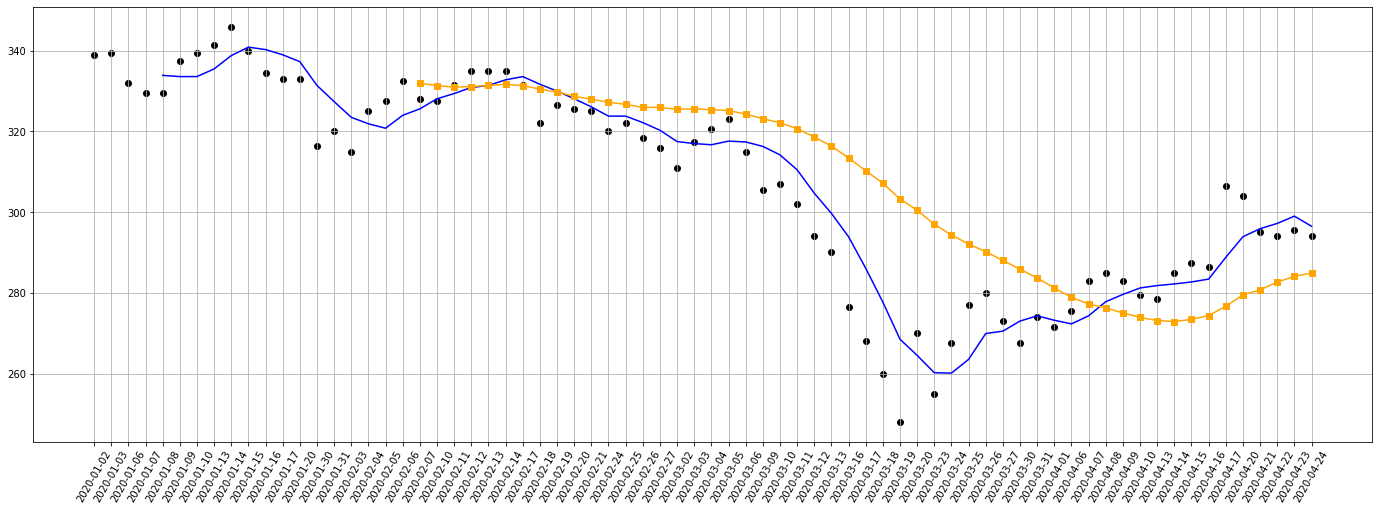

In [ ]:
fig = plt.figure(figsize=(24, 8))
plt.scatter(df_ma["date"],df_ma["close"], color='black')
plt.plot(df_ma["date"],df_ma["MA_5"], color='blue')
plt.plot(df_ma["date"],df_ma["MA_20"], color="orange", marker='s')
plt.xticks(rotation=60)
plt.grid()
plt.show()

# 資料應用概覽

## 流程

![](https://cdn.datamentor.io/wp-content/uploads/2018/04/the-data-science-process.jpg)

![](https://tdwi.org/-/media/TDWI/Upside/newsletters/2019/01/012919Fujimaki.jpg)

- Get
    - file: csv, json
    - crawler: requests, lxml, beautifulsoup, selenium, scrapy
    - sql: pymysql
- Explore & ETL
    - numpy
    - pandas
    - visualization: matplotlib, seaborn 
- Model
    - scikit-learn
    - TensorFlow
    - PyTorch
    - Keras
- Communicate


## Get Data / Data Collection by crawler


In [ ]:
import requests 
def stock_crawler(stock_id):
    url = "https://fund.bot.com.tw/Z/ZC/ZCW/CZKC1.djbcd?a={}&b=D&c=60".format(stock_id)
    resp = requests.get(url)
    html = resp.text
    group = html.split(" ")
    g_date,g_open,g_high,g_low,g_close,g_volume = group[0:5+1]
    g_date = g_date.split(",")
    g_open = g_open.split(",")
    g_high = g_high.split(",")
    g_low = g_low.split(",")
    g_close = g_close.split(",")
    g_volume = g_volume.split(",")
    datas = []
    for i in range(0,len(g_date)):
        datas.append([stock_id,g_date[i].replace("/","-"),float(g_open[i]),float(g_high[i]),float(g_low[i]),float(g_close[i]),int(g_volume[i])])
    return datas

In [ ]:
data_2330 = stock_crawler("2330")
data_2317 = stock_crawler("2317")
data_2603 = stock_crawler("2603")

## ETL

In [ ]:
import pandas as pd
df_2330 = pd.DataFrame(data_2330)
df_2330.columns = ["stock_id","date","open","high","low","close","volume"]
df_2317 = pd.DataFrame(data_2317)
df_2317.columns = ["stock_id","date","open","high","low","close","volume"]
df_2603 = pd.DataFrame(data_2603)
df_2603.columns = ["stock_id","date","open","high","low","close","volume"]
df = pd.concat([df_2330,df_2317,df_2603])
df.columns = ["stock_id","date","open","high","low","close","volume"]
df

,stock_id,date,open,high,low,close,volume
0,2330,2021-01-08,580.0,580.0,571.0,580.0,62957
1,2330,2021-01-11,577.0,584.0,574.0,584.0,52772
2,2330,2021-01-12,583.0,597.0,582.0,591.0,52605
3,2330,2021-01-13,595.0,605.0,593.0,605.0,75708
4,2330,2021-01-14,587.0,597.0,587.0,592.0,90310
...,...,...,...,...,...,...,...
55,2603,2021-04-09,52.5,52.7,49.0,50.0,388104
56,2603,2021-04-12,52.9,55.0,52.1,55.0,350198
57,2603,2021-04-13,55.3,59.0,54.0,56.9,428171
58,2603,2021-04-14,58.6,60.4,54.2,59.9,629635


## Feature Engineering：

#### 獨立性：
- 開盤價跟收盤價差異不會太大 => 用昨日價格預測
- 均線包含當天 => 去除今天

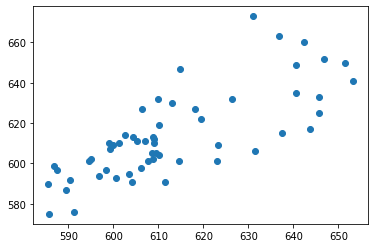

In [ ]:
### Explore ==========
df_2330['MA_5'] = df_2330['close'].rolling(5).mean()
plt.scatter(df_2330["MA_5"],df_2330['close'])

In [ ]:
import numpy as np
df_2330["open-1"] = df_2330['open'].shift(1)
df_2330["close-1"]= df_2330['close'].shift(1)
df_2330['MA_5-1'] = df_2330['close'].shift(1).rolling(5).mean()
df_2330['diff']  = df_2330['close']-df_2330['close'].shift(1) 
df_2330["UD"]    = np.where(df_2330['diff']>0,"U","D")
df_2330

,stock_id,date,open,high,low,close,volume,MA_5,open-1,close-1,MA_5-1,diff,UD
0,2330,2021-01-08,580.0,580.0,571.0,580.0,62957,NaN,NaN,NaN,NaN,NaN,D
1,2330,2021-01-11,577.0,584.0,574.0,584.0,52772,NaN,580.0,580.0,NaN,4.0,U
2,2330,2021-01-12,583.0,597.0,582.0,591.0,52605,NaN,577.0,584.0,NaN,7.0,U
3,2330,2021-01-13,595.0,605.0,593.0,605.0,75708,NaN,583.0,591.0,NaN,14.0,U
4,2330,2021-01-14,587.0,597.0,587.0,592.0,90310,590.4,595.0,605.0,NaN,-13.0,D
5,2330,2021-01-15,621.0,625.0,601.0,601.0,100998,594.6,587.0,592.0,590.4,9.0,U
6,2330,2021-01-18,608.0,608.0,594.0,607.0,50389,599.2,621.0,601.0,594.6,6.0,U
7,2330,2021-01-19,618.0,632.0,613.0,627.0,52947,606.4,608.0,607.0,599.2,20.0,U
8,2330,2021-01-20,633.0,650.0,631.0,647.0,95484,614.8,618.0,627.0,606.4,20.0,U
9,2330,2021-01-21,640.0,679.0,640.0,673.0,97590,631.0,633.0,647.0,614.8,26.0,U


## Model / Machine Learning：scikit-learn

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [ ]:
from sklearn import metrics

### 非監督式學習

#### 分群：[K-means](https://medium.com/@a4793706/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-k-means-clustering-in-python-%E9%99%84%E7%A8%8B%E5%BC%8F%E7%A2%BC%E4%BB%8B%E7%B4%B9-55c19bcf2280)

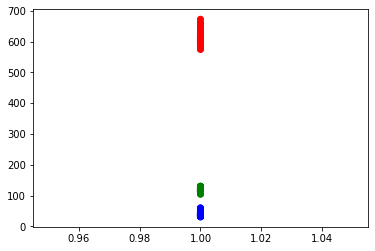

In [ ]:
### Explore ==========
import matplotlib.pyplot as plt
df2 = df.copy()
df2["temp"] = 1
colmap = {"2330":'r',"2317":'g',"2603":'b'}
df2['color'] = df['stock_id'].map(lambda x:colmap[x])
plt.scatter(df2["temp"],df2['close'],color=df2['color'])

In [ ]:
### Model ==========
from sklearn import cluster

# 建立模型
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(df[["close"]])

# 預測
df2["label"]  = kmeans_fit.labels_
df2

,stock_id,date,open,high,low,close,volume,temp,color,label
0,2330,2021-01-08,580.0,580.0,571.0,580.0,62957,1,r,1
1,2330,2021-01-11,577.0,584.0,574.0,584.0,52772,1,r,1
2,2330,2021-01-12,583.0,597.0,582.0,591.0,52605,1,r,1
3,2330,2021-01-13,595.0,605.0,593.0,605.0,75708,1,r,1
4,2330,2021-01-14,587.0,597.0,587.0,592.0,90310,1,r,1
...,...,...,...,...,...,...,...,...,...,...
55,2603,2021-04-09,52.5,52.7,49.0,50.0,388104,1,b,2
56,2603,2021-04-12,52.9,55.0,52.1,55.0,350198,1,b,2
57,2603,2021-04-13,55.3,59.0,54.0,56.9,428171,1,b,2
58,2603,2021-04-14,58.6,60.4,54.2,59.9,629635,1,b,2


衡量績效：組間差異大，組內差異小 => [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)


In [ ]:
# 績效
silhouette_avg = metrics.silhouette_score(df[["close"]], df2["label"])
print(silhouette_avg)

0.9193936389865112


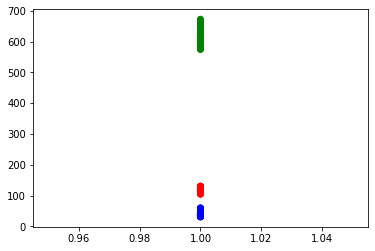

In [ ]:
### Communicate ==========
colmap = {0:'r',1:'g',2:'b'}
df2['color'] = df2['label'].map(lambda x:colmap[x])
plt.scatter(df2["temp"],df2['close'],color=df2['color'])

### 監督式學習：
- X 是要拿來預測的資料
- Y 是想預測的結果

#### 迴歸
- R Squared 接近 1
- MAE, MSE 接近 0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
df_2330['MA_5'] = df_2330['close'].rolling(5).mean()
training_column = ["MA_5"]
start_index = 4 # 因 MA_5 前4天是空值，`start_index=4`(第五天 index=4 開始計算)

# 切分訓練與測試資料
train_X, test_X, train_Y, test_Y = train_test_split(df_2330[training_column][start_index:], df_2330['close'][start_index:], test_size = 0.3)

# 建立模型
clf = LinearRegression()
data_clf = clf.fit(train_X, train_Y)

# 預測
test_Y_predicted = data_clf.predict(test_X)

# 績效
print('MAE:', metrics.mean_absolute_error(test_Y, test_Y_predicted))  
print('MSE:', metrics.mean_squared_error(test_Y, test_Y_predicted))  
print('R Squared:',data_clf.score(test_X, test_Y))

MAE: 13.278566341914791
MSE: 295.47628733978013
R Squared: 0.38554947658413474


In [ ]:
training_column = ["close-1"]
start_index = 1

# 切分訓練與測試資料
train_X, test_X, train_Y, test_Y = train_test_split(df_2330[training_column][start_index:], df_2330['close'][start_index:], test_size = 0.3)

# 建立模型
clf = LinearRegression()
data_clf = clf.fit(train_X, train_Y)

# 預測
test_Y_predicted = data_clf.predict(test_X)

# 績效
print('MAE:', metrics.mean_absolute_error(test_Y, test_Y_predicted))  
print('MSE:', metrics.mean_squared_error(test_Y, test_Y_predicted))  
print('R Squared:',data_clf.score(test_X, test_Y))

MAE: 9.624121590634141
MSE: 174.82643615835235
R Squared: 0.6000637898546504


由於此份資料為單一股票的日交易資料，為連續性質，  
切分方式以某一時間為切點，之前為訓練資料，拿往後的資料當測試資料，較為符合情境。

In [ ]:
training_column = ["close-1"]
start_index = 1
test_limit = 5

# 切分訓練與測試資料
train_X = df_2330[training_column][start_index:len(df_2330)-test_limit]
test_X  = df_2330[training_column][len(df_2330)-test_limit:]
train_Y = df_2330["close"][start_index:len(df_2330)-test_limit]
test_Y  = df_2330["close"][len(df_2330)-test_limit:]

# 建立模型
clf = LinearRegression()
data_clf = clf.fit(train_X, train_Y)

# 預測
test_Y_predicted = data_clf.predict(test_X)

# 績效
print('MAE:', metrics.mean_absolute_error(test_Y, test_Y_predicted))  
print('MSE:', metrics.mean_squared_error(test_Y, test_Y_predicted))  
print('R Squared:',data_clf.score(test_X, test_Y))

MAE: 4.575792518290427
MSE: 23.640084997649648
R Squared: 0.12314224786165996


#### 決策樹

In [ ]:
from sklearn import tree

training_column = ["open","volume"]
target_column = ["UD"]
start_index = 5
test_limit = 5

# 切分訓練與測試資料
train_X = df_2330[training_column][start_index:len(df_2330)-test_limit]
test_X  = df_2330[training_column][len(df_2330)-test_limit:]
train_Y = df_2330[target_column][start_index:len(df_2330)-test_limit]
test_Y  = df_2330[target_column][len(df_2330)-test_limit:]

# 建立模型
clf = tree.DecisionTreeClassifier(max_depth = 3)
data_clf = clf.fit(train_X, train_Y)


# 預測
test_Y_predicted = data_clf.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_Y, test_Y_predicted)
print(accuracy)

0.8


## Communicate / Visulization

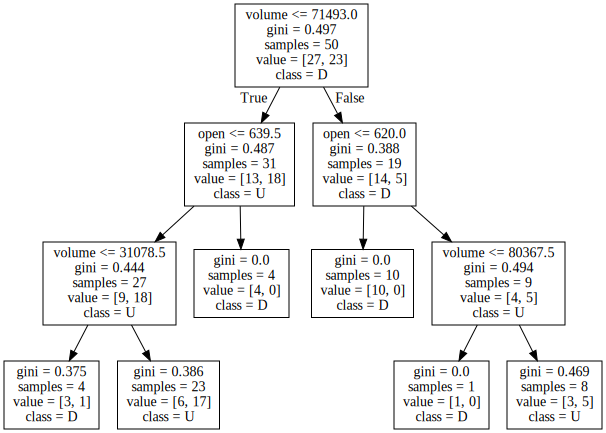

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=training_column,class_names=clf.classes_)

graph = graphviz.Source(dot_data) 
graph

#[jieba 中文分詞](https://github.com/fxsjy/jieba)



In [ ]:
import jieba
word = "2012年我創立了一間公司 來教女孩寫程式"
seg_list = jieba.cut(word, cut_all=True)
print("Full Mode: " + "/ ".join(seg_list)) 

seg_list = jieba.cut_for_search(word)
print("Search Mode: " + "/ ".join(seg_list)) 

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.910 seconds.
Prefix dict has been built successfully.


Full Mode: 2012/ 年/ 我/ 創/ 立/ 了/ 一/ 間/ 公司/ /  / / 來/ 教女/ 女孩/ 寫/ 程式
Search Mode: 2012/ 年/ 我/ 創立/ 了/ 一間/ 公司/  / 來教/ 女孩/ 寫/ 程式


In [ ]:
import jieba.posseg as pseg
seg_list = pseg.cut(word)
for word, flag in seg_list:
    print('{} {}'.format(word, flag))

2012 m
年 m
我 r
創立 v
了 ul
一間 m
公司 n
  x
來 v
教 n
女孩 n
寫 zg
程式 n


# What's next?
## [PyLadies 過往活動](https://marsw.github.io/Python-Tutorial/08_resources.slides.html#/2)
- [Python入門(週末密集充實版)](https://tw.pyladies.com/events/topic.html?id=46)
- [業界常用工具與技術分享](https://tw.pyladies.com/events/topic.html?id=47)
- [金融數據應用](https://tw.pyladies.com/events/topic.html?id=50)
- [資料科學家體驗工作坊](https://tw.pyladies.com/events/event.html?id=168)

## Roadmap
- [網站 & 資料庫](https://roadmap.sh/backend)
- [資料工程](https://github.com/datastacktv/data-engineer-roadmap)
- 資料科學家(https://github.com/MrMimic/data-scientist-roadmap)
    - [Deep Learning](https://www.geeksforgeeks.org/how-to-become-data-scientist-a-complete-roadmap/)


![](https://marsw.github.io/Python-Tutorial/images/00_roadmap.png)
